In [179]:
#Importing required libraries
import numpy as np
import pandas as pd
from tensorflow import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [180]:
df=pd.read_csv(r"D:/train/train.csv")
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [181]:
base_path="D:/Landmark_Detection"
samples=20000
df1=df.loc[df["id"].str.startswith('00',na=False),:]
df2=df.loc[df["id"].str.startswith('01',na=False),:]

In [182]:
df1

,id,landmark_id
119,00cba0067c078490,27
120,00f928e383e1d121,27
796,009ecdb56b5e9adb,60
1089,00d5d47528839144,124
1133,00e9003a381ab809,134
...,...,...
1578695,0064ecfae82480a0,202886
1579525,0006bd092b119041,202939
1579599,00b7015e96e32c1a,202950
1579715,001e45514ceb27c9,202972


In [183]:
df2

,id,landmark_id
12,0193b65bb58d2c77,9
121,0110a04e618bc368,27
704,01d1a2461b033111,43
1622,01ce06a27f0e6031,192
1814,014ad414fa73802a,219
...,...,...
1579212,015180ee67aaf84f,202913
1579396,0173c9eded5774da,202916
1579730,017a1deda51c2f88,202979
1579865,01fe9bd1aadd1536,202987


In [184]:
df3=pd.concat([df1,df2])

In [185]:
df3

,id,landmark_id
119,00cba0067c078490,27
120,00f928e383e1d121,27
796,009ecdb56b5e9adb,60
1089,00d5d47528839144,124
1133,00e9003a381ab809,134
...,...,...
1579212,015180ee67aaf84f,202913
1579396,0173c9eded5774da,202916
1579730,017a1deda51c2f88,202979
1579865,01fe9bd1aadd1536,202987


In [186]:
df=df3

In [187]:
df

,id,landmark_id
119,00cba0067c078490,27
120,00f928e383e1d121,27
796,009ecdb56b5e9adb,60
1089,00d5d47528839144,124
1133,00e9003a381ab809,134
...,...,...
1579212,015180ee67aaf84f,202913
1579396,0173c9eded5774da,202916
1579730,017a1deda51c2f88,202979
1579865,01fe9bd1aadd1536,202987


In [188]:
num_classes=len(df["landmark_id"].unique())
num_data=len(df)

In [189]:
num_classes

9761

In [190]:
num_data

12284

In [191]:
data=pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace=True)

In [192]:
data.head()

,landmark_id,count
0,138982,51
1,83144,23
2,194914,13
3,126637,13
4,20409,11


In [193]:
data.tail()

,landmark_id,count
9756,143045,1
9757,143042,1
9758,142999,1
9759,142971,1
9760,203007,1


In [194]:
data.columns=['landmark_id','count']
data['count'].describe()

count    9761.000000
mean        1.258478
std         0.906537
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        51.000000
Name: count, dtype: float64

In [195]:
print(data)

      landmark_id  count
0          138982     51
1           83144     23
2          194914     13
3          126637     13
4           20409     11
...           ...    ...
9756       143045      1
9757       143042      1
9758       142999      1
9759       142971      1
9760       203007      1

[9761 rows x 2 columns]


In [196]:
type(data['count'])

pandas.core.series.Series

(array([9.753e+03, 6.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

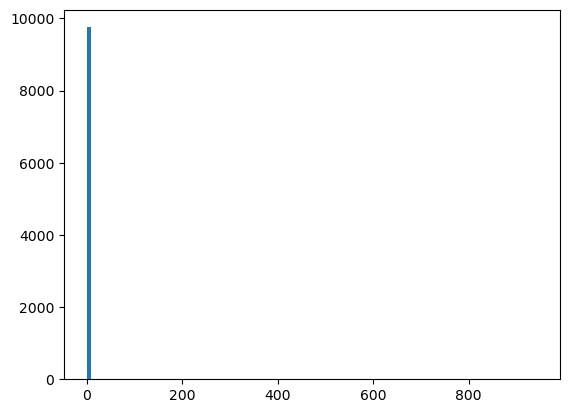

In [197]:
plt.hist(data['count'],bins=100,range=(0,944),label='test')

In [198]:
data['count'].between(0,5).sum()

9716

In [199]:
data['count'].between(5,10).sum()

78

(array([4., 1., 1., ..., 1., 3., 2.]),
 array([9.00000000e+00, 2.97968446e+01, 5.05936892e+01, ...,
        2.02965406e+05, 2.02986203e+05, 2.03007000e+05]),
 <BarContainer object of 9761 artists>)

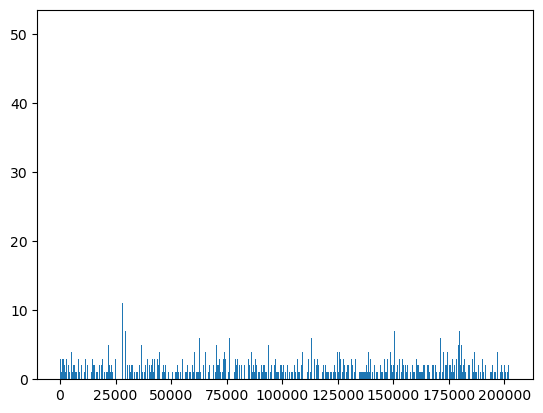

In [200]:
plt.hist(df['landmark_id'],bins=len(df['landmark_id'].unique()))

In [201]:
#Model Training
from sklearn.preprocessing import LabelEncoder
lcode=LabelEncoder()
lcode.fit(df["landmark_id"])
df.head()

,id,landmark_id
119,00cba0067c078490,27
120,00f928e383e1d121,27
796,009ecdb56b5e9adb,60
1089,00d5d47528839144,124
1133,00e9003a381ab809,134


In [202]:
print(df)
data = list(zip(df.id,df.landmark_id))

                       id  landmark_id
119      00cba0067c078490           27
120      00f928e383e1d121           27
796      009ecdb56b5e9adb           60
1089     00d5d47528839144          124
1133     00e9003a381ab809          134
...                   ...          ...
1579212  015180ee67aaf84f       202913
1579396  0173c9eded5774da       202916
1579730  017a1deda51c2f88       202979
1579865  01fe9bd1aadd1536       202987
1579927  019691e0fe7c8cf2       203007

[12284 rows x 2 columns]


In [203]:
data

[('00cba0067c078490', 27),
 ('00f928e383e1d121', 27),
 ('009ecdb56b5e9adb', 60),
 ('00d5d47528839144', 124),
 ('00e9003a381ab809', 134),
 ('00024ea6140f4221', 136),
 ('00b21051d358ca30', 136),
 ('0064acfa759f4153', 192),
 ('00d13816f412d159', 192),
 ('0085f53615e18389', 294),
 ('00e37d0c7ab10fef', 354),
 ('007ff8952d3bbb20', 389),
 ('002cf77393f82b81', 392),
 ('002d022dd6eff825', 392),
 ('00154c7aae3e6c6c', 454),
 ('008ecd81dc3ad4ed', 454),
 ('00c76f24c9680c35', 454),
 ('00aeec674e151329', 553),
 ('00ddc89cdad85d91', 578),
 ('0087293d5b4efa86', 596),
 ('00e3181a20faac68', 607),
 ('004b48d93571a00c', 624),
 ('00996d66a8347514', 663),
 ('00a9c1c1f837abf8', 713),
 ('0046156ef03cebe4', 863),
 ('0022f65f805872d8', 881),
 ('002173a167a640ce', 1009),
 ('0001b7ba0106b4d6', 1032),
 ('005cd8ac6f17cd92', 1032),
 ('0046441c2f4a6206', 1101),
 ('008866536800d9d4', 1127),
 ('00128c8476862bc1', 1131),
 ('0041117d787d7576', 1189),
 ('009ce452e16e80b1', 1189),
 ('001bd980026ce584', 1200),
 ('000428e0ff8

In [204]:
data[0]

('00cba0067c078490', 27)

In [205]:
import glob
image_names_sample=[os.path.basename(file) for file in glob.glob(os.path.join(base_path,"images_000",'0','0','0','*.jpg'))]
image_names_sample

['0000059611c7d079.jpg',
 '0000070506c174cc.jpg',
 '000008ae30de967e.jpg',
 '000014b1f770f640.jpg',
 '000015f76534add3.jpg',
 '00001ae42cd00356.jpg',
 '00001b2ba2c69ac5.jpg',
 '00001d45edef6c9e.jpg',
 '000020dfc079c013.jpg',
 '000022ce0b9d8966.jpg',
 '000023c32b21633a.jpg',
 '00002df2f4ee4fd8.jpg',
 '0000341f232b1354.jpg',
 '0000348ec8d36fff.jpg',
 '00003885d955e33e.jpg',
 '00003c210da9c664.jpg',
 '00003c7d492beaad.jpg',
 '00003fe2469cdbf5.jpg',
 '000041d74a3d86ec.jpg',
 '00004208e2bc0cc0.jpg',
 '00004426322b89ea.jpg',
 '0000533c9fabd72d.jpg',
 '000054af45275b62.jpg',
 '000057b3930adc99.jpg',
 '00005880928302c8.jpg',
 '0000596a22cf651b.jpg',
 '00005f617bc1763e.jpg',
 '00005fe6644e2e83.jpg',
 '000068d9ced0823c.jpg',
 '000071a7b8200ad3.jpg',
 '00007594d1b97325.jpg',
 '000079b071a759e4.jpg',
 '00007cd6511f823e.jpg',
 '0000810970d54157.jpg',
 '0000881ba27d769a.jpg',
 '000093d877cef4e8.jpg',
 '000095cd8b012807.jpg',
 '00009c91ff911fdd.jpg',
 '0000ae056149919f.jpg',
 '0000c60a968c6b92.jpg',


In [206]:
img_sample,lbl_sample=data[0]
print(img_sample)
print(lbl_sample)

00cba0067c078490
27


In [207]:
def encode(lbl):
  return lcode.transform(lbl)
def decode(lbl):
  return lcode.inverse_transform(lbl)
def get_img_from_num(num,dataframe):
  data = list(zip(dataframe.id,dataframe.landmark_id))
  imgname,lbl=data[num]
  imgname=imgname+'.jpg'
  #first 3 characters of the image name correspond to the folders in which it is stored
  folder1=imgname[0]
  folder2=imgname[1]
  folder3=imgname[2]
  Path=os.path.join(folder1,folder2,folder3,imgname)
  image_names1=[os.path.basename(file) for file in glob.glob(os.path.join(base_path,"images_000",folder1,folder2,folder3,'*.jpg'))]
  image_names2=[os.path.basename(file) for file in glob.glob(os.path.join(base_path,"images_001",folder1,folder2,folder3,'*.jpg'))]
  if imgname in image_names1:
     img=cv2.imread(os.path.join(base_path,"images_000",Path))
     return img,lbl
  elif imgname in image_names2:
     img=cv2.imread(os.path.join(base_path,"images_001",Path))
     return img,lbl 
  else :
    return None,None

4 sample images from random classes


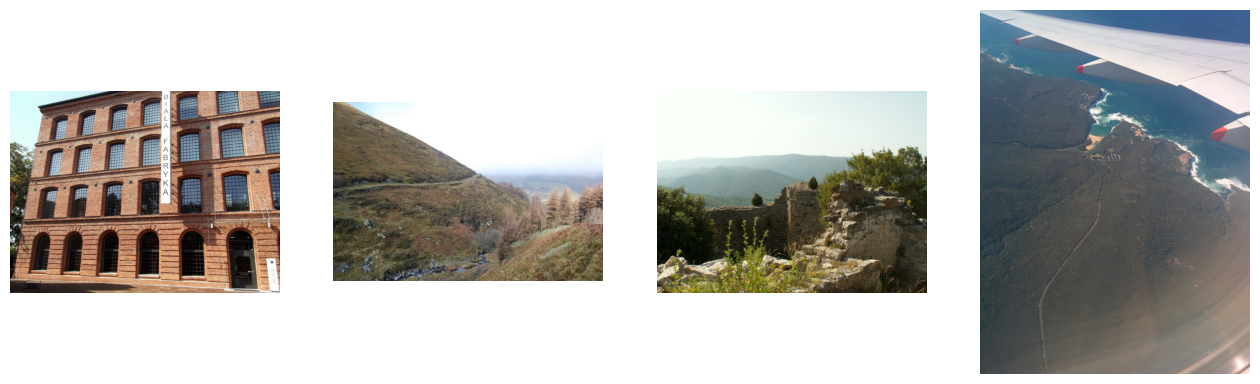

In [208]:
print("4 sample images from random classes")
fig=plt.figure(figsize=(16,16))
for i in range(1,5):
  ri=random.choice(os.listdir(base_path))
  folder_name=base_path+'/'+ri
  ri=random.choice(os.listdir(folder_name))
  folder_name=folder_name+'/'+ri
  ri=random.choice(os.listdir(folder_name))
  folder_name=folder_name+'/'+ri
  ri=random.choice(os.listdir(folder_name))
  folder_name=folder_name+'/'+ri
  random_image=random.choice(os.listdir(folder_name))
  img=np.array(Image.open(folder_name+'/'+random_image))
  fig.add_subplot(1,4,i)
  plt.imshow(img)
  plt.axis('off')
plt.show()

In [209]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import*
from tensorflow.keras import Sequential
from tensorflow import compat
compat.v1.disable_eager_execution()

In [210]:
learning_rate=0.0001
decay_speed=1e-6
loss_function="sparse_categorical_crossentropy"
source_model=VGG19(weights=None)
drop_layer=Dropout(0.5)
drop_layer2=Dropout(0.5)

In [211]:
model=Sequential()

In [212]:
for layer in source_model.layers[:-1]:
  if layer==source_model.layers[-25]:
    model.add(BatchNormalization())
  model.add(layer)
model.add(Dense(num_classes,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 224, 224, 3)       12        
 chNormalization)                                                
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                      

In [213]:
optimizer1=keras.optimizers.legacy.RMSprop(learning_rate=learning_rate)

In [214]:
model.compile(optimizer=optimizer1,loss=loss_function,metrics=["accuracy"])

In [215]:
def im_reshape(im,target_size):
  return cv2.resize(im,target_size)
def get_batch(dataframe,start,batch_size):
  img_arr=[]
  lbl_arr=[]
  end_image=start+batch_size
  if (end_image)>len(dataframe):
    end_image=len(dataframe)
  for idx in range(start,end_image):
    n=idx
    im,label=get_img_from_num(n,dataframe)
    if im is not None:
        im=im_reshape(im,(224,224))/255.0
        img_arr.append(im)
        lbl_arr.append(label)
  lbl_arr=encode(lbl_arr)
  return np.array(img_arr),np.array(lbl_arr)
batch_size=16
epoch_shuffle=True
weight_classes=True
epochs=1

In [216]:
train,val=np.split(df.sample(frac=1),[int(0.8*len(df))])

In [217]:
print(len(train))

9827


In [218]:
print(len(val))

2457


In [219]:
train

,id,landmark_id
315677,002610a16719b7ab,40111
716849,019ab8341d0328ab,92204
615742,00c06c841c170138,79184
16748,015dd3c2fbac4d3b,2182
324908,00fb845330ae838b,41170
...,...,...
1577324,01802dd04dbb8877,202773
1077244,0006f34cf361f69c,138982
1552662,0138b324ebe7978d,199506
594612,00ae8ff977f01912,76253


In [220]:
for e in range(epochs):
  print("Epoch :"+str(e+1)+"/"+str(epochs))
  if epoch_shuffle:
    train=train.sample(frac=1)
  for it in range(int(np.ceil(len(train)/batch_size))):
    x_train,y_train=get_batch(train,it*batch_size,batch_size)
    model.train_on_batch(x_train,y_train)
model.save("Model")

Epoch :1/1
INFO:tensorflow:Assets written to: Model\assets


INFO:tensorflow:Assets written to: Model\assets


In [222]:
#Testing
batch_size=16
errors=0
good_preds=[]
bad_preds=[]
for it in range(int(np.ceil(len(val)/batch_size))):
    x_val,y_val=get_batch(val,it*batch_size,batch_size)
    result=model.predict(x_val)
    cla=np.argmax(result,axis=1)
    for idx,res in enumerate(result):
        if cla[idx]!=y_val[idx]:
            errors=errors+1;
            bad_preds.append(([batch_size*it+idx],cla[idx],res[cla[idx]]))
        else:
            good_preds.append(([batch_size*it+idx],cla[idx],res[cla[idx]]))

In [226]:
good=[]
for ele in good_preds:
    good.append([ele[0][0],ele[1],ele[2]])
good

[[67, 6689, 0.00010969867],
 [101, 6689, 0.00010969861],
 [883, 6689, 0.00010969857],
 [1618, 6689, 0.00010969866],
 [1625, 6689, 0.00010969863],
 [1752, 6689, 0.00010969862],
 [1879, 6689, 0.000109698565]]

In [227]:
good_preds=np.array(good)
def key(x):
    return x[2]
good_preds=np.array(sorted(good_preds,key=key,reverse=True))

In [228]:
good_preds

array([[6.70000000e+01, 6.68900000e+03, 1.09698667e-04],
       [1.61800000e+03, 6.68900000e+03, 1.09698660e-04],
       [1.62500000e+03, 6.68900000e+03, 1.09698631e-04],
       [1.75200000e+03, 6.68900000e+03, 1.09698623e-04],
       [1.01000000e+02, 6.68900000e+03, 1.09698609e-04],
       [8.83000000e+02, 6.68900000e+03, 1.09698572e-04],
       [1.87900000e+03, 6.68900000e+03, 1.09698565e-04]])

C:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

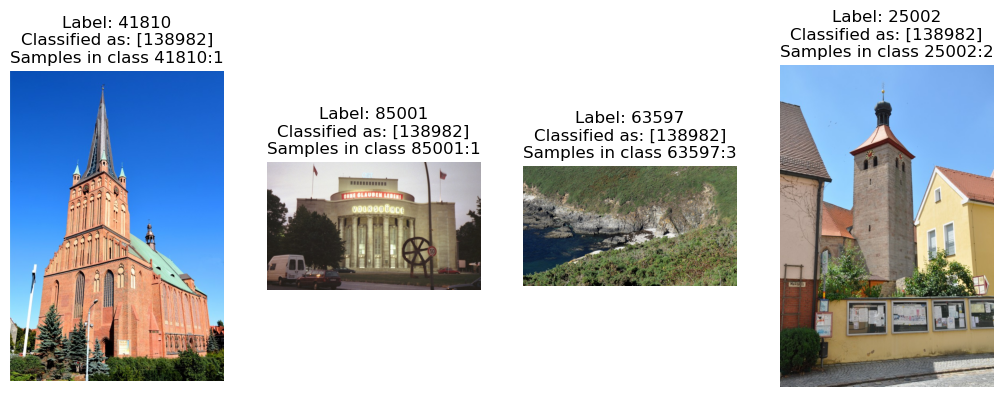

In [230]:
fig=plt.figure(figsize=(16,16))
for i in range(1,6):
    n=int(good_preds[i,0])
    img,lbl=get_img_from_num(n,val)
    if img is not None:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        fig.add_subplot(1,5,i)
        plt.imshow(img)
        lbl2=np.array(int(good_preds[i,1])).reshape(1,1)
        sample_cnt=list(df.landmark_id).count(lbl)
        plt.title("Label: "+str(lbl)+"\nClassified as: "+str(decode(lbl2))+"\nSamples in class "+str(lbl)+":"+str(sample_cnt))
        plt.axis('off')
plt.show()